# Dynamic Systems Assignment #1: Introduction to Dynamic Systems

* This is Assignment#1 on Dynamic Systems. It is intended to give you some experience on representing motion in moving (non Inertial) frames.

* Save this file in your Institutional G-Suite google drive and rename it starting with your index number. For example if you are E/90/512 then rename the file to 
'E90512_Assignment#1_DynamicSystems.ipynb'

* Get started!

* Once complete share with smaithri@eng.pdn.ac.lk and chanakatb@eng.pdn.ac.lk

* Submit the link at the end of Lesson 4: 'Lesson on Dynamic Systems'

* Upload the file through the Assignment Submission Link at the end of the Lesson.

# Setting Up Python

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import plotly.graph_objects as go

import sympy as sym
from sympy import symbols
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [2]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None])])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

In [3]:
md=mugas_dynamic_systems_simulation_functions()

# Example: Spring and a Mass

Consider the problem of a horizontal spring with one end fixed to a support and the other end fixed to an object, of mass $m$, that moves on a smooth horizontal table. 

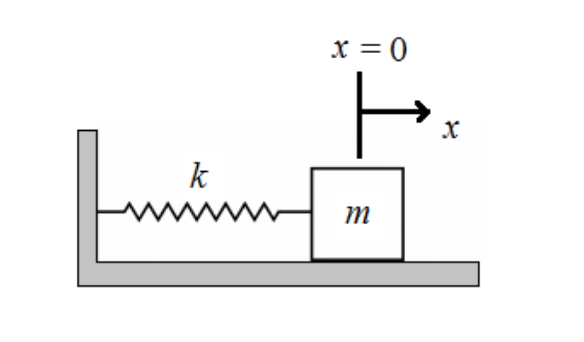


### Governing Equations

Considering the motion of the block and assuming that all surface interactions are negligible we have
\begin{align}
m\ddot{x}+kx&=0
\end{align}
where $x$ is the displacement of the object from its equilibrium rest position.

### Solution to the ODE

Let $\omega_n^2\triangleq k/m$. Then we have that the above equations can be written as $\ddot{x}+\omega_n^2 x=0$. Taking Laplace transforms of $\ddot{x}+\omega_n^2 x$ and using the linearity property of the Laplace transform operator we have
\begin{align}
\mathcal{L}\left\{\ddot{x}+\omega_n^2 x\right\}=\mathcal{L}\left\{\ddot{x}\right\}+\omega_n^2 \mathcal{L}\left\{x\right\}=\left(s^2\mathcal{L}\left\{x\right\}-sx(0)-\dot{x}(0)\right)+\omega_n^2 \mathcal{L}\left\{x\right\}.
\end{align}
Thus we have
\begin{align}
X(s)&=\frac{s}{s^2+\omega_n^2}\,x(0)+\frac{1}{s^2+\omega_n^2}\,\dot{x}(0).
\end{align}
Since the Laplace transform is a one to one taking the inverse Laplace transform we have
\begin{align}
x(t)&=\mathcal{L}^{-1}\left\{X(s)\right\}=x(0)\,\mathcal{L}^{-1}\left\{\frac{s}{s^2+\omega_n^2}\right\}+\dot{x}(0)\,\mathcal{L}^{-1}\left\{\frac{1}{s^2+\omega_n^2}\right\}\\
&=x(0)\,\cos{(\omega_n t)}+\frac{\dot{x}(0)}{\omega_n}\sin{(\omega_nt)}\sim A\,\cos{(\omega_nt+\phi)}
\end{align}

### Dynamic System Form

Let $X_1\triangleq x$ and $X_2\triangleq \dot{x}$. Then we can write the second order ODE $\ddot{x}+\omega_n^2x=0$ as the following coupled set of first order ODEs.
\begin{align}
\dot{X}_1&=X_2,\\
\dot{X}_2&=-\omega_n^2\,X_1.
\end{align}
This we can write down as the following first order matrix ODE
\begin{align}
\begin{bmatrix}
\dot{X}_1\\ \dot{X}_2
\end{bmatrix}&=
\underbrace{\begin{bmatrix}
0 & 1\\ -\omega_n^2 & 0
\end{bmatrix}}_{A}
\underbrace{\begin{bmatrix}
{X}_1\\ {X}_2
\end{bmatrix}}_{X}.
\end{align}
\begin{align}
\dot{X}=AX
\end{align}
This is typically referred to as the dynamic systems form of the system.
Re-writing this we have the sequence of steps
\begin{align}
\dot{X}-AX&=0\\
e^{-At}\dot{X}-e^{-At}AX&=0\\
\dfrac{d}{dt}e^{-At}X&=0\\
\int_0^t\dfrac{d}{dt}e^{-At}X&=0\\
e^{-At}X(t)-X(0)&=0.
\end{align}
Which finally gives
\begin{align}
X(t)&=e^{At}X(0).
\end{align}
This is called the matrix exponential solution of the linear dynamic system $\dot{X}=AX$.

In [4]:
omega_n, t, x0, v0=symbols('omega_n, t, x0, v0');
A=Matrix([[0,1],[-omega_n**2, 0]])

In [5]:
x=dynamicsymbols('x')

In [ ]:
latex(A)

'\\left[\\begin{matrix}0 & 1\\\\- \\omega_{n}^{2} & 0\\end{matrix}\\right]'

In [7]:
At=t*A

In [ ]:
At

Matrix([
[            0, t],
[-omega_n**2*t, 0]])

In [8]:
simplify(At.exp()) @ Matrix([[x0],[v0]])

Matrix([
[ x0*cos(omega_n*t) + v0*sin(omega_n*t)/omega_n],
[-omega_n*x0*sin(omega_n*t) + v0*cos(omega_n*t)]])

In [9]:
latex(simplify(At.exp()) @ Matrix([[x0],[v0]]))

'\\left[\\begin{matrix}x_{0} \\cos{\\left(\\omega_{n} t \\right)} + \\frac{v_{0} \\sin{\\left(\\omega_{n} t \\right)}}{\\omega_{n}}\\\\- \\omega_{n} x_{0} \\sin{\\left(\\omega_{n} t \\right)} + v_{0} \\cos{\\left(\\omega_{n} t \\right)}\\end{matrix}\\right]'

### Simulation of the Motion

In [ ]:
md=mugas_dynamic_systems_simulation_functions()

In [ ]:
def LinearSystemModel(X, t, parameters):
  A=parameters[0]; B=parameters[1];
  u=0 #np.sin(0.1*t); #Input
  dXdt=A @ X + B*u;
  return dXdt
m=1; k=1;
A=np.array([[0,1],[-k/m,0]]);
B=np.array([0,1./m]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 10,0.01, [1,0], [A, B], 'Spring Mass System', 'Time / t', 'x')

In [ ]:
def LinearSystemModel(X, t, A):
  dXdt=A @ X + B*u;
  return dXdt

In [ ]:
m=1; k=1;
A=np.array([[0,1],[-k/m,0]]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 10,0.01, [1,0], A, 'Spring Mass System', 'Time / t', 'x')

# Coupled Spring Mass System - Example#1

Consider the coupled spring mass system:

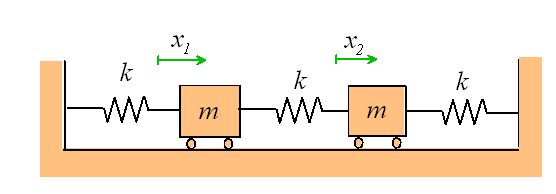

Isolating each of the masses and applying Newton's eaquations for each of them seperately we have:

\begin{align}
m\ddot{x}_1&=-kx_1-k(x_1-x_2),\\
m\ddot{x}_2&=-kx_2-k(x_2-x_1)
\end{align}

Which can be written as:
\begin{align}
M\ddot{X}+KX&=0
\end{align}
where
\begin{align}
X=\begin{bmatrix}x_1\\x_2\end{bmatrix},\:\:\:\:
M=\begin{bmatrix}m & 0\\0 & m\end{bmatrix},\:\:\:\:
K=\begin{bmatrix}2k & -k\\ -k & 2k\end{bmatrix}
\end{align}

This can also be written in the dynamic system form
\begin{align}
\dot{Y}&=AY
\end{align}
where
\begin{align}
Y=\begin{bmatrix}x_1\\x_2\\\dot{x}_1\\\dot{x}_2\end{bmatrix},\:\:\:\:
A=\begin{bmatrix}0 & 0 & 1 &0\\ 0 & 0& 0 &1\\\frac{k}{m} & -\frac{2k}{m} & 0 &0 \\-\frac{2k}{m} & \frac{k}{m} & 0 &0 
\end{bmatrix}.
\end{align}

In [ ]:
m=1; k=1;
A=np.array([[0,0,1,0],[0,0,0,1],[-2*k/m,k/m,0,0],[k/m,-2*k/m,0,0]]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 50,0.01, [1,0,0,0], A, 'Coupled Spring Mass System', 'Time / t', 'x')

In [ ]:
KE=m*(sol[:,2]**2+sol[:,3]**2)/2
PE=k*(sol[:,0]**2+sol[:,1]**2+(sol[:,0]-sol[:,1])**2)/2
TE=KE+PE;

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=KE, mode='lines',name='KE'))
fig.add_trace(go.Scatter(x=t, y=PE, mode='lines',name='PE'))
fig.add_trace(go.Scatter(x=t, y=TE, mode='lines',name='TE'))
fig.update_layout(title='Energy Vs Time')
fig.show()

In [ ]:
P=m*sol[:,2]+m*sol[:,3]
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=P, mode='lines',name='Linear Momentum'))
fig.update_layout(title='Linear Momentum Vs Time')
fig.show()

#Coupled Spring Mass System - Example#2

Consider the coupled spring mass system:

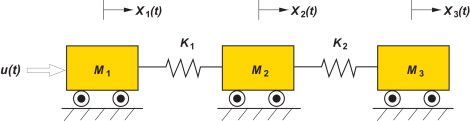

Isolating each of the masses and applying Newton's eaquations for each of them seperately we have:

\begin{align}
m_1\ddot{x}_1&=-k_1(x_1-x_2)+u,\\
m_2\ddot{x}_2&=-k_1(x_2-x_1)-k_2(x_2-x_3)\\
m_3\ddot{x}_3&=-k_2(x_3-x_2)
\end{align}

Which can be written as:
\begin{align}
M\ddot{X}+KX&=Fu
\end{align}
where
\begin{align}
X=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix},\:\:\:\:
M=\begin{bmatrix}m_1 & 0 &0 \\0 & m_2 & 0\\ 0 & 0 & m_3\end{bmatrix},\:\:\:\:
K=\begin{bmatrix}
k_1 & -k_1 & 0\\ -k_1 & (k_1+k_2) & -k_2\\ 0 & -k_2 & k_3
\end{bmatrix},\:\:\:\:
F=\begin{bmatrix}1\\0\\0\end{bmatrix}
\end{align}

This can also be written in the dynamic system form
\begin{align}
\dot{Y}&=AY+B\,u(t)
\end{align}
where
\begin{align}
Y=\begin{bmatrix}x_1\\x_2\\x_3\\\dot{x}_1\\\dot{x}_2\\\dot{x}_3\end{bmatrix},\:\:\:\:
A=\begin{bmatrix}0 & 0 & 0 & 1 &0 & 0\\ 0 & 0& 0 & 0 & 1 & 0\\0 & 0& 0 & 0 & 0 & 1\\-\frac{k_1}{m_1} & \frac{k_1}{m_1} & 0 & 0 & 0 &0 \\\frac{k_1}{m_2} & -\frac{k_1+k_2}{m_2} & \frac{k_2}{m_2} &0 &0&0\\ 0 & \frac{k_2}{m_3} & -\frac{k_3}{m_3} & 0 & 0 & 0
\end{bmatrix},\:\:\:\:
B=\begin{bmatrix}0\\0\\0\\1\\0\\0\end{bmatrix}.
\end{align}

In [ ]:
m1=1; m2=1; m3=1; k1=1; k2=1; k3=1;
A=np.array([[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[-k1/m1,k1/m1,0,0,0,0],[k1/m2,-(k1+k2)/m2, k2/m2,0,0,0],[0,k2/m3,-k3/m3,0,0,0]]);
[t,sol,fig]=mr.simulateDySystem(LinearSystemModel, 50,0.01, [1,0,0,0,0,0], A, 'Coupled Spring Mass System', 'Time / t', 'x')

In [ ]:
KE=(m1*sol[:,3]**2+m2*sol[:,4]**2+m3*sol[:,5]**2)/2
PE=(k1*(sol[:,0]-sol[:,1])**2+k1*(sol[:,1]-sol[:,2])**2)/2
TE=KE+PE;

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=KE, mode='lines',name='KE'))
fig.add_trace(go.Scatter(x=t, y=PE, mode='lines',name='PE'))
fig.add_trace(go.Scatter(x=t, y=TE, mode='lines',name='TE'))
fig.update_layout(title='Energy Vs Time')
fig.show()

In [ ]:
P=m1*sol[:,3]+m2*sol[:,4]+m3*sol[:,5]
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=P, mode='lines',name='Linear Momentum'))
fig.update_yaxes(range=[-0.1,0.1])
fig.update_layout(title='Linear Momentum Vs Time')
fig.show()

# Q4 Coupled Electro Mechanical System


Consider the 1-DOF electrostatic MEMS mirror model  shown in the figure below. Find the governing differential equations of the system. Note that the capacitance between 
two parallel plate capacitors are given by $c(l(t))=\frac{\epsilon A}{l(t)}$ and the attractive coulomb force between the two plates are given by $f_e(t)=\frac{q(t)^2}{2\epsilon A}$ where 
$A$ is the cross sectional area of the plates. The zero voltage gap between the two plates is $l_0$.



*   stating the assumption involved derive the governing equations of the system
*   simulate the behavior of the system for $r=1$, $\epsilon=1$, $A=1$, $m=1$, $k=1$, $b=0.01$, $l_0=1$, and various types of $v(t)$.



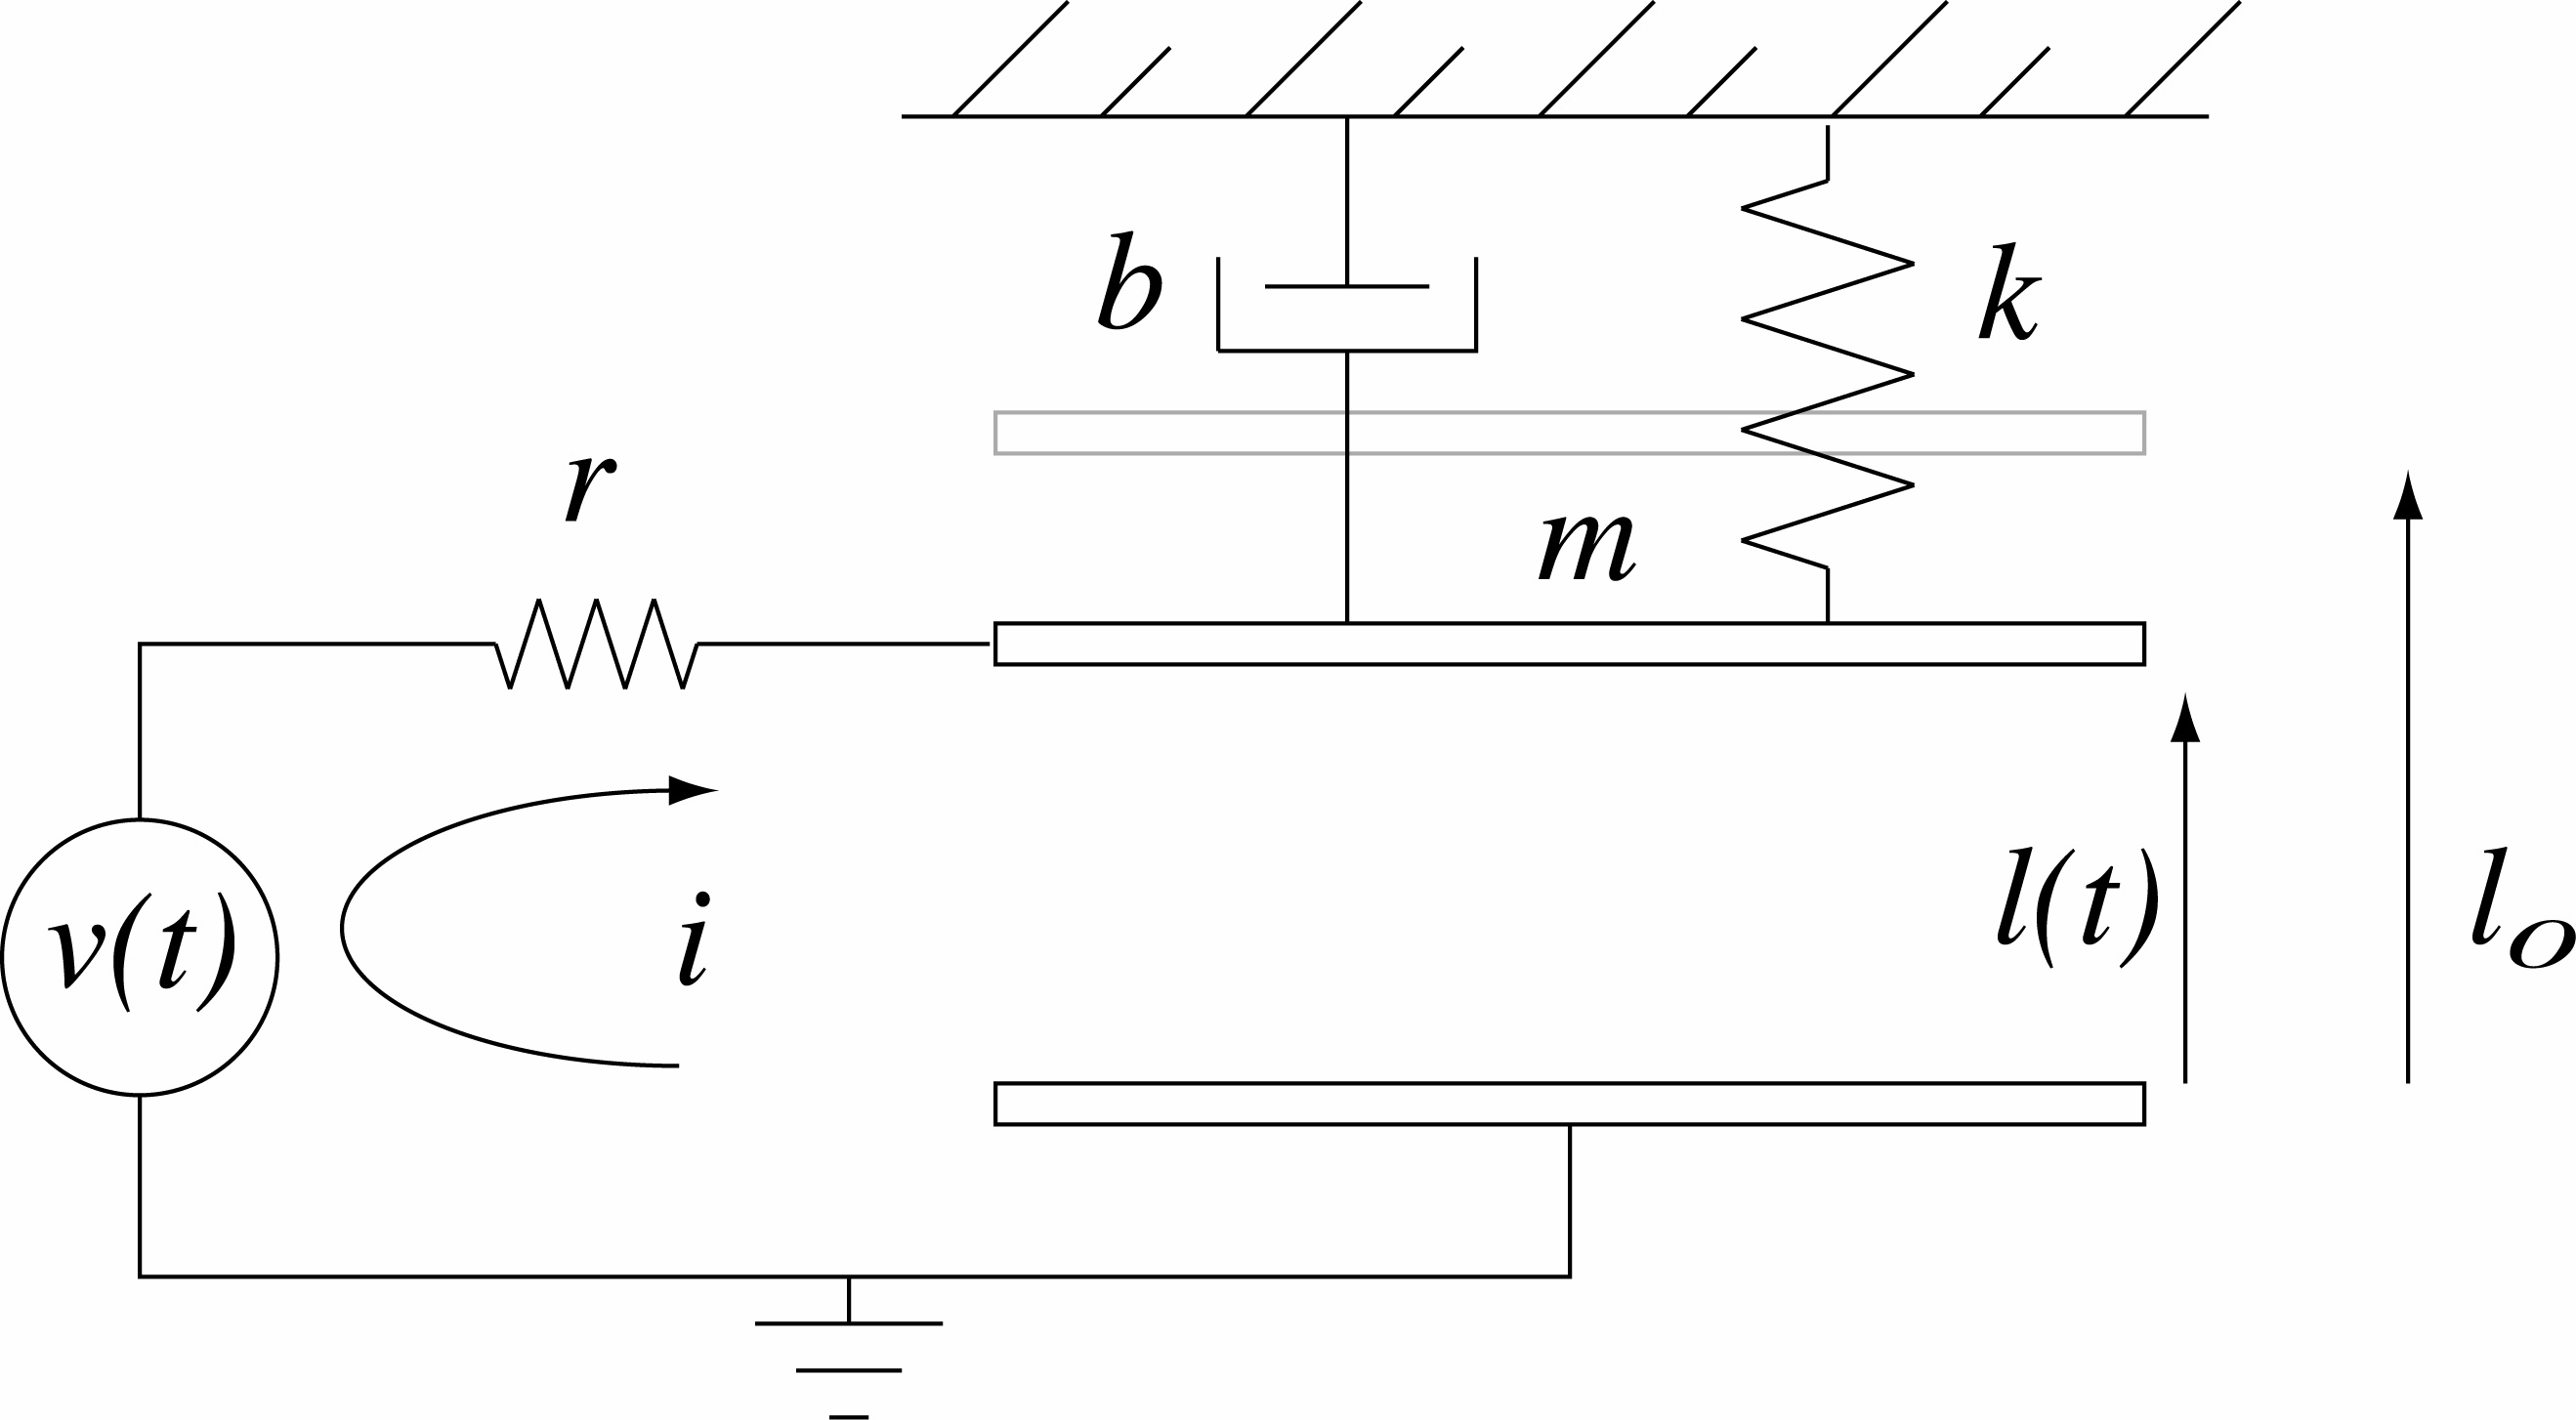

## Typical Answer

Let $Q(t)$ be the charge of the device, $i(t)$ be the current through
the resistor, $l(t)$ be the air gap,  $v(t)$ be the input voltage,
$l_0$ be the zero voltage gap, $A$ be the plate area, and
$\epsilon$ be the permittivity in the gap. Then, the capacitance
of the device is equal to $\epsilon A/l(t)$, the attractive
electrostatic force on the top plate is $F(t) ~=~ \frac{Q(t)^2}{2 \epsilon A}$,
and the current through the resistance $r$ is
\begin{align}
i(t) &= \frac{1}{r} \left ( v(t) - \frac{Q(t) l(t) }{\epsilon
A}\right ).
\end{align}
Thus, the complete equations of motion are,
\begin{align}
m\ddot{l}(t) &= -b \dot{l}(t) - k (l(t) - l_0) -
\frac{Q^2(t)}{2 \epsilon A},  \\ 
\dot{Q}(t) &=\frac{1}{r} \left(v(t) - \frac{Q(t)l(t)}{\epsilon A}\right). 
\end{align}
The dynamic system form of this equations are 
\begin{align}
\dot{X}&=F(t,X).
\end{align}
Where 
\begin{align}
X&\triangleq \begin{bmatrix} Q \\ l\\\dot{l}\end{bmatrix}\\
F(t,X)&\triangleq \begin{bmatrix} \frac{1}{r} \left(v(t) - \frac{Q(t)l(t)}{\epsilon A}\right)\\\dot{l}\\-b \dot{l}(t) - k (l(t) - l_0) -
\frac{Q^2(t)}{2 \epsilon A}
\end{bmatrix}
\end{align}

In [ ]:
def coupled_EM_system(X, t, sysParameters):
  Q=X[0]; l=X[1]; dl=X[2]
  m=sysParameters[0]; k=sysParameters[1]; b=sysParameters[2]; l0=sysParameters[3]; 
  r=sysParameters[4]; epsilon=sysParameters[5]; A=sysParameters[1];
  vt=5*np.sin(5*t);
  dQ=(vt-Q*l/(epsilon*A))/r;
  ddl=-b*dl-k*(l-l0)-Q**2/(2*epsilon*A)
  return [dQ,dl,ddl]

In [ ]:
m=1; k=1; b=0.2; l0=1; r=1; l0=1; epsilon=1; A=1;
[t,sol,fig]=md.simulateDySystem(coupled_EM_system, 50,0.1, [0,0.5,0], [m,k,b,l0,r,epsilon,A], 'X(t)  Vs t', 'Time / t', 'X_i(t)')

# Q5 Spring Mass Damper System


Consider the spring mass damber system shown below and answer the following.
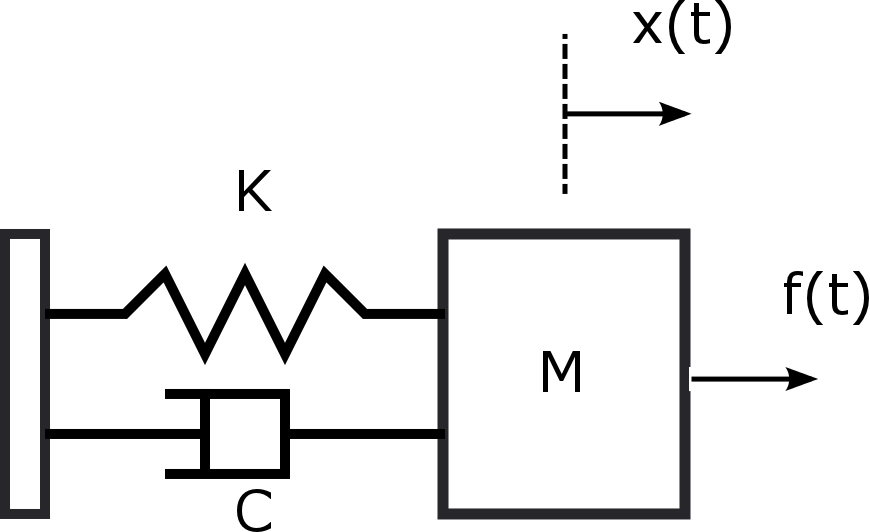

## Q5.1 Show that the small amplitude motion of the system is governed by

\begin{align}
\ddot{x}+2\zeta \omega_n\dot{x}+\omega_n^2 x=\frac{1}{M} f(t)
\end{align}
where $\omega_n^2=K/M$ and $2\zeta \omega_n=C/M$

In [ ]:
omega_n, zeta, M, t, x0, dx0=symbols('omega_n, zeta, M, t, x0, dx0');
A=Matrix([[0,1],[-omega_n**2, -2*zeta*omega_n]])

In [ ]:
A.eigenvals()

{omega_n*(-zeta + sqrt((zeta - 1)*(zeta + 1))): 1,
 omega_n*(-zeta - sqrt((zeta - 1)*(zeta + 1))): 1}

In [ ]:
At=t*A
resp=simplify(At.exp()) @ Matrix([[x0],[dx0]])

In [ ]:
omega_d=omega_n*sqrt(1-zeta**2)

## Q5.2 Response of the system

### Q5.2.1 Undamped system $\zeta=0$

#### Q5.2.1.1 Show that when $\zeta = 0$ the poles of the system $-\lambda_1, -\lambda_2$ are given by
\begin{align}
-\lambda_1, -\lambda_2=\pm i\omega_n,
\end{align}
and that the solution takes the form
\begin{align}
\left[\begin{array}{c}x_1(t) \\ x_2(t)\end{array} \right]=
\left[\begin{array}{c}c_{11}\,\sin{\omega_n t}+ c_{12}\,\cos{\omega_n t}\\ c_{21}\,\sin{\omega_n t}+ c_{22}\,\cos{\omega_n t} \end{array} \right].
\end{align}

#### Q5.2.1.2 Simulate the motion of the system for $\zeta=0$ and compare it with the analytical solution above and also relate the behavior to the location of the poles of the system.

### Q5.2.2 Under-damped system $0<\zeta<1$

#### Q5.2.2.1 Show that when $0<\zeta <1$ the poles of the system $-\lambda_1, -\lambda_2$ are given by
\begin{align}
-\lambda_1, \lambda_2=-\zeta \omega_n\pm i\omega_d,,
\end{align}
where $\omega_d=\omega_n\sqrt{1-\zeta^2}$
and that the solution takes the form
\begin{align}
\left[\begin{array}{c}x_1(t) \\ x_2(t)\end{array} \right]=
\left[\begin{array}{c}e^{-\zeta\omega_n t}(c_{11}\,\sin{\omega_d t}+ c_{12}\,\cos{\omega_d t})\\ e^{-\zeta\omega_n t}(c_{21}\,\sin{\omega_d t}+ c_{22}\,\cos{\omega_d t}) \end{array} 
\right].
\end{align}

##### Typical location of the poles

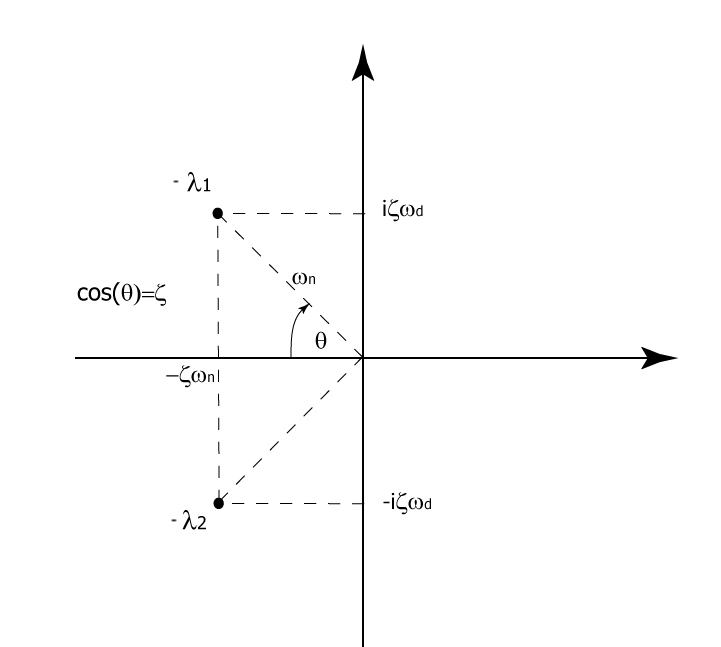

#### Q5.2.2.2 Simulate the motion of the system for $0<\zeta<1$ and compare it with the analytical solution above. Relate the response to the location of the poles of the system.

### Q5.2.3 Over-damped system $\zeta>1$

#### Q5.2.3.1 Show that when $\zeta >1$ the poles of the system $-\lambda_1, -\lambda_2$ are given by
\begin{align}
-\lambda_1, -\lambda_2=\omega_n(-\zeta \pm \sqrt{1-\zeta^2}),
\end{align}
and that the solution takes the form
\begin{align}
\left[\begin{array}{c}x_1(t) \\ x_2(t)\end{array} \right]=
\left[\begin{array}{c}c_{11}\,e^{-\lambda_1 t}+c_{12} \,e^{-\lambda_2 t} \\ -\lambda_1c_{11}\,e^{-\lambda_1 t}-\lambda_2c_{12}\,e^{-\lambda_2 t} \end{array} \right].
\end{align}

#### Q5.2.3.2 Simulate the motion of the system for $\zeta>1$ and compare it with the analytical solution above. Relate the response to the location of the poles of the system.

### Q5.2.4 Critically-damped system $\zeta=1$

#### Q5.2.4.1 Show that when $\zeta =1$ the poles of the system $-\lambda_1, -\lambda_2$ are given by
\begin{align}
-\lambda_1, -\lambda_2=-\zeta\omega_n,
\end{align}
and that the solution takes the form
\begin{align}
\left[\begin{array}{c}x_1(t) \\ x_2(t)\end{array} \right]=
\left[\begin{array}{c}e^{-\omega_n t}(c_{11}+c_{12}\,t )\\ e^{-\omega_n t}(c_{21}+ c_{22}\,t) \end{array} \right].
\end{align}

#### Q5.2.4.2 Simulate the motion of the system for $\zeta=1$ and compare it with the analytical solution above. Relate the response to the location of the poles of the system.

## SImulation of a Spring-Mass-Damper System

In [ ]:
def LinearSystemModel(X, t, A):
  dXdt=A @ X
  return dXdt
wn=1; zeta=0.1;
A=np.array([[0,1],[-wn**2,-2*zeta*wn]]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 40,0.01, [1,0], A, 'Spring Mass System', 'Time / t', 'x')

# Practice

In [ ]:
omega_n, zeta, x, s=symbols('omega_n, zeta, x, s');
A=Matrix([[0,1],[-omega_n**2, -2*zeta*omega_n]])

sym.solveset(x ** 4 - 1, x)

In [ ]:
answ1=sym.solveset(s ** 2+2*zeta*omega_n*s+omega_n**2, s)

In [ ]:
answ1

FiniteSet(omega_n*(-zeta + sqrt((zeta - 1)*(zeta + 1))), omega_n*(-zeta - sqrt((zeta - 1)*(zeta + 1))))

In [ ]:
latex(answ1)

'\\left\\{\\omega_{n} \\left(- \\zeta - \\sqrt{\\left(\\zeta - 1\\right) \\left(\\zeta + 1\\right)}\\right), \\omega_{n} \\left(- \\zeta + \\sqrt{\\left(\\zeta - 1\\right) \\left(\\zeta + 1\\right)}\\right)\\right\\}'

In [ ]:
latex(A.eigenvals())

'\\left\\{ \\omega_{n} \\left(- \\zeta - \\sqrt{\\left(\\zeta - 1\\right) \\left(\\zeta + 1\\right)}\\right) : 1, \\  \\omega_{n} \\left(- \\zeta + \\sqrt{\\left(\\zeta - 1\\right) \\left(\\zeta + 1\\right)}\\right) : 1\\right\\}'

In [ ]:
latex(A.eigenvects())

'\\left[ \\left( \\omega_{n} \\left(- \\zeta - \\sqrt{\\left(\\zeta - 1\\right) \\left(\\zeta + 1\\right)}\\right), \\  1, \\  \\left[ \\left[\\begin{matrix}\\frac{1}{- \\omega_{n} \\zeta - \\omega_{n} \\sqrt{\\zeta^{2} - 1}}\\\\1\\end{matrix}\\right]\\right]\\right), \\  \\left( \\omega_{n} \\left(- \\zeta + \\sqrt{\\left(\\zeta - 1\\right) \\left(\\zeta + 1\\right)}\\right), \\  1, \\  \\left[ \\left[\\begin{matrix}\\frac{1}{- \\omega_{n} \\zeta + \\omega_{n} \\sqrt{\\zeta^{2} - 1}}\\\\1\\end{matrix}\\right]\\right]\\right)\\right]'

In [ ]:
1/(2*1.7*sqrt(1-0.5**2))

0.339617805405662